In [1]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('Iris.csv')

In [15]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
df = df.drop(columns='Id')

In [18]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


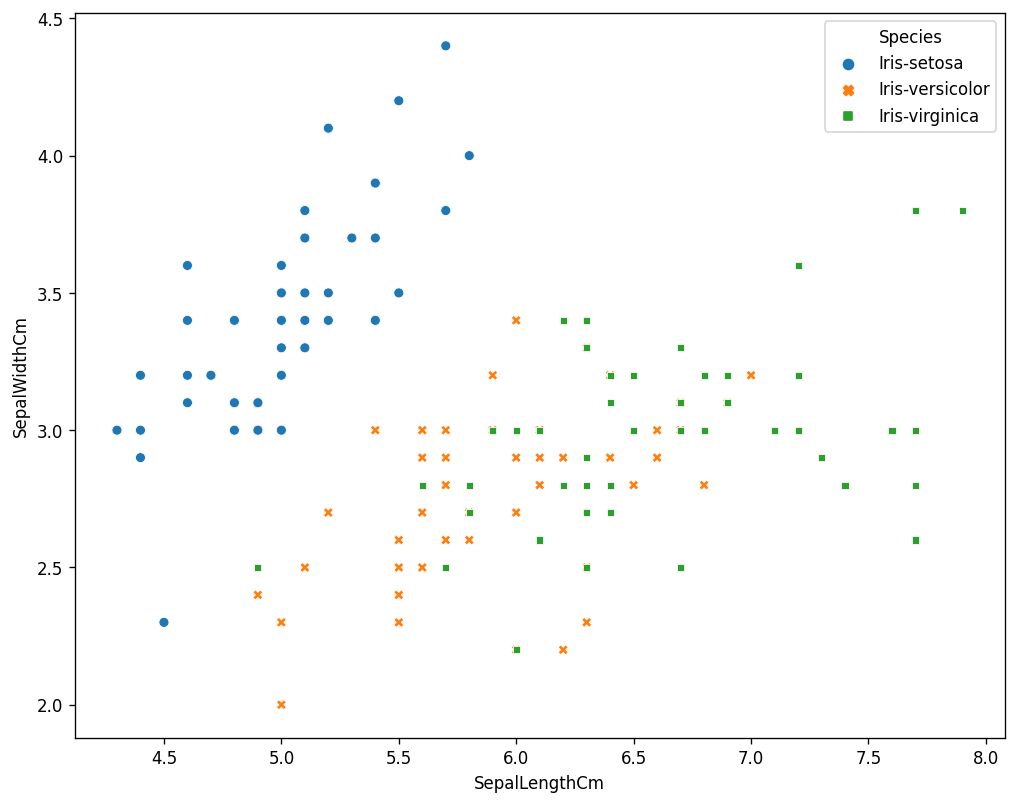

In [24]:
plt.figure(figsize=(10,8),dpi=120)
g = sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df, hue='Species',style='Species')
plt.show()

In [26]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
X = df.drop('Species',axis=1)
y= df['Species']

<AxesSubplot: >

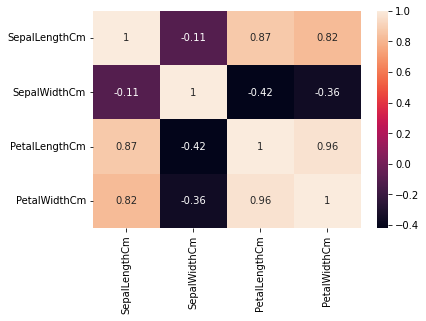

In [30]:
sns.heatmap(X.corr(),annot=True)

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [34]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [35]:
classifier.fit(X_train,y_train)

GaussianNB()

In [36]:
y_pred = classifier.predict(X_test)

In [43]:
y_pred

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0])

In [37]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [39]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]], dtype=int64)

In [44]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [46]:

f1_score(y_test,y_pred,average='macro')

0.9644444444444445

In [47]:
recall_score(y_test,y_pred,average='macro')

0.9583333333333334

In [48]:
precision_score(y_test,y_pred,average='macro')

0.9743589743589745